# Telco Customer Churn - Exploratory Data Analysis

This notebook performs comprehensive exploratory data analysis on the Telco customer churn dataset to understand customer behavior patterns and identify key factors contributing to churn.

## 1. Import Required Libraries

In [1]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configure display settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load and Explore Dataset

In [2]:
# Load the dataset
df = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

print(f"Dataset Shape: {df.shape}")
print(f"\nDataset loaded with {df.shape[0]:,} rows and {df.shape[1]} columns")
df.head()

Dataset Shape: (7043, 21)

Dataset loaded with 7,043 rows and 21 columns


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Display dataset information
print("=" * 80)
print("DATASET INFORMATION")
print("=" * 80)
df.info()

print("\n" + "=" * 80)
print("STATISTICAL SUMMARY")
print("=" * 80)
df.describe()

DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
# Check for missing values
print("Missing Values:")
print("=" * 80)
missing_df = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print(missing_df if len(missing_df) > 0 else "No missing values found!")

# Check data types
print("\n" + "=" * 80)
print("Data Types:")
print("=" * 80)
print(df.dtypes)

Missing Values:
No missing values found!

Data Types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


## 3. Data Cleaning and Preparation

In [5]:
# Convert TotalCharges to numeric (it might have spaces)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Handle missing values in TotalCharges
if df['TotalCharges'].isnull().sum() > 0:
    print(f"Found {df['TotalCharges'].isnull().sum()} null values in TotalCharges")
    # For new customers, TotalCharges might be empty. We'll fill with MonthlyCharges
    df['TotalCharges'].fillna(df['MonthlyCharges'], inplace=True)
    print("Filled missing TotalCharges with MonthlyCharges")

# Convert SeniorCitizen to categorical
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

print("\nData cleaning completed!")
print(f"Final dataset shape: {df.shape}")

Found 11 null values in TotalCharges
Filled missing TotalCharges with MonthlyCharges

Data cleaning completed!
Final dataset shape: (7043, 21)


## 4. Churn Distribution Analysis

Churn Distribution:
No: 5,174 (73.46%)
Yes: 1,869 (26.54%)


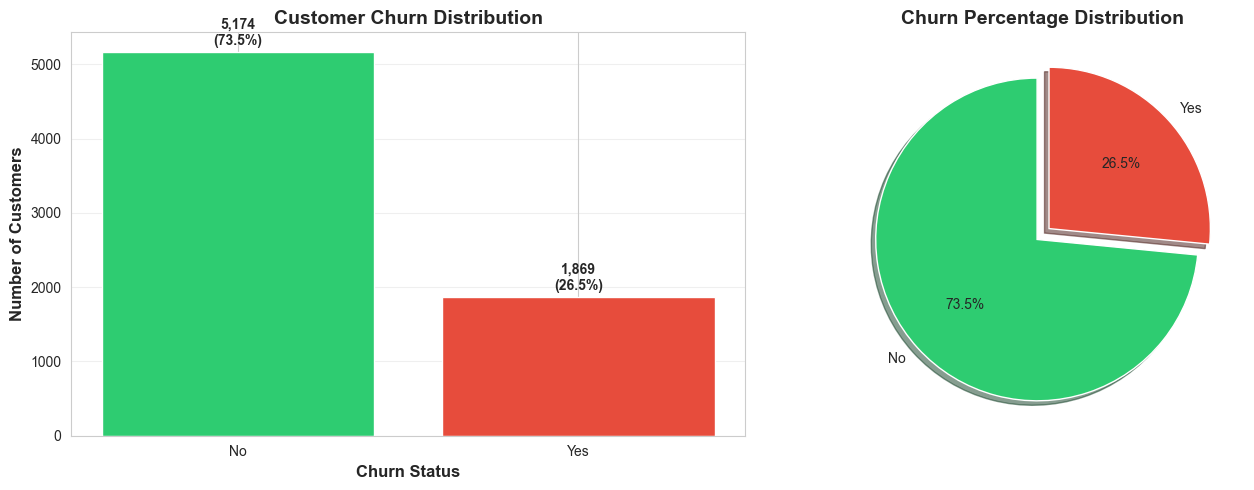


✓ Churn rate: 26.54%


In [6]:
# Analyze churn distribution
churn_counts = df['Churn'].value_counts()
churn_percentage = df['Churn'].value_counts(normalize=True) * 100

print("Churn Distribution:")
print("=" * 80)
for label, count in churn_counts.items():
    pct = churn_percentage[label]
    print(f"{label}: {count:,} ({pct:.2f}%)")

# Visualize churn distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
axes[0].bar(churn_counts.index, churn_counts.values, color=['#2ecc71', '#e74c3c'])
axes[0].set_xlabel('Churn Status', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Number of Customers', fontsize=12, fontweight='bold')
axes[0].set_title('Customer Churn Distribution', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (label, value) in enumerate(zip(churn_counts.index, churn_counts.values)):
    axes[0].text(i, value + 50, f'{value:,}\n({churn_percentage[label]:.1f}%)', 
                ha='center', va='bottom', fontweight='bold')

# Pie chart
colors = ['#2ecc71', '#e74c3c']
explode = (0.05, 0.05)
axes[1].pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%',
           colors=colors, explode=explode, shadow=True, startangle=90)
axes[1].set_title('Churn Percentage Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../static/images/churn_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\n✓ Churn rate: {churn_percentage['Yes']:.2f}%")

## 5. Numerical Features Analysis

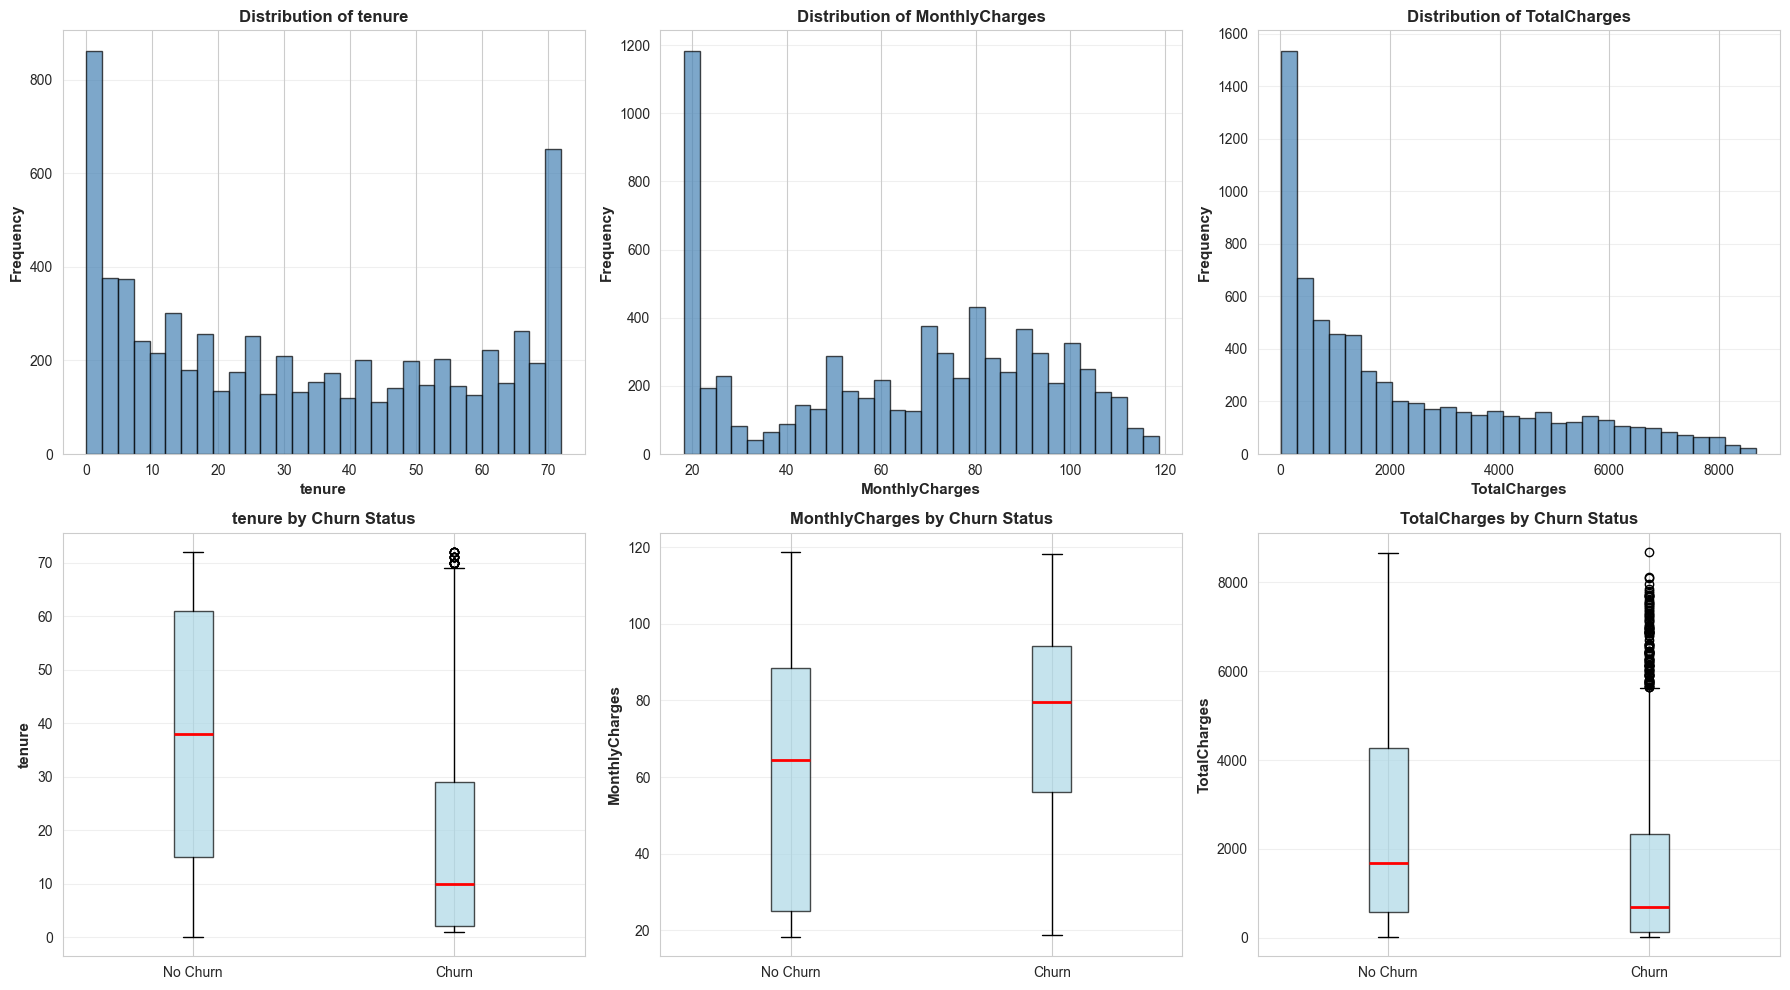


NUMERICAL FEATURES BY CHURN STATUS

tenure:
        count   mean    std  min   25%   50%   75%   max
Churn                                                   
No     5174.0  37.57  24.11  0.0  15.0  38.0  61.0  72.0
Yes    1869.0  17.98  19.53  1.0   2.0  10.0  29.0  72.0

MonthlyCharges:
        count   mean    std    min    25%    50%   75%     max
Churn                                                         
No     5174.0  61.27  31.09  18.25  25.10  64.43  88.4  118.75
Yes    1869.0  74.44  24.67  18.85  56.15  79.65  94.2  118.35

TotalCharges:
        count    mean      std    min    25%      50%      75%      max
Churn                                                                  
No     5174.0  2550.0  2329.86  18.80  572.9  1679.52  4262.85  8672.45
Yes    1869.0  1531.8  1890.82  18.85  134.5   703.55  2331.30  8684.80


In [7]:
# Identify numerical columns
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Distribution plots for numerical features
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    # Histogram
    axes[idx].hist(df[col], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
    axes[idx].set_xlabel(col, fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Frequency', fontsize=11, fontweight='bold')
    axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[idx].grid(axis='y', alpha=0.3)
    
    # Box plot by churn
    axes[idx + 3].boxplot([df[df['Churn'] == 'No'][col].dropna(), 
                            df[df['Churn'] == 'Yes'][col].dropna()],
                           labels=['No Churn', 'Churn'],
                           patch_artist=True,
                           boxprops=dict(facecolor='lightblue', alpha=0.7),
                           medianprops=dict(color='red', linewidth=2))
    axes[idx + 3].set_ylabel(col, fontsize=11, fontweight='bold')
    axes[idx + 3].set_title(f'{col} by Churn Status', fontsize=12, fontweight='bold')
    axes[idx + 3].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../static/images/numerical_features.png', dpi=150, bbox_inches='tight')
plt.show()

# Statistical summary by churn status
print("\n" + "=" * 80)
print("NUMERICAL FEATURES BY CHURN STATUS")
print("=" * 80)
for col in numerical_cols:
    print(f"\n{col}:")
    print(df.groupby('Churn')[col].describe().round(2))

## 6. Categorical Features Analysis

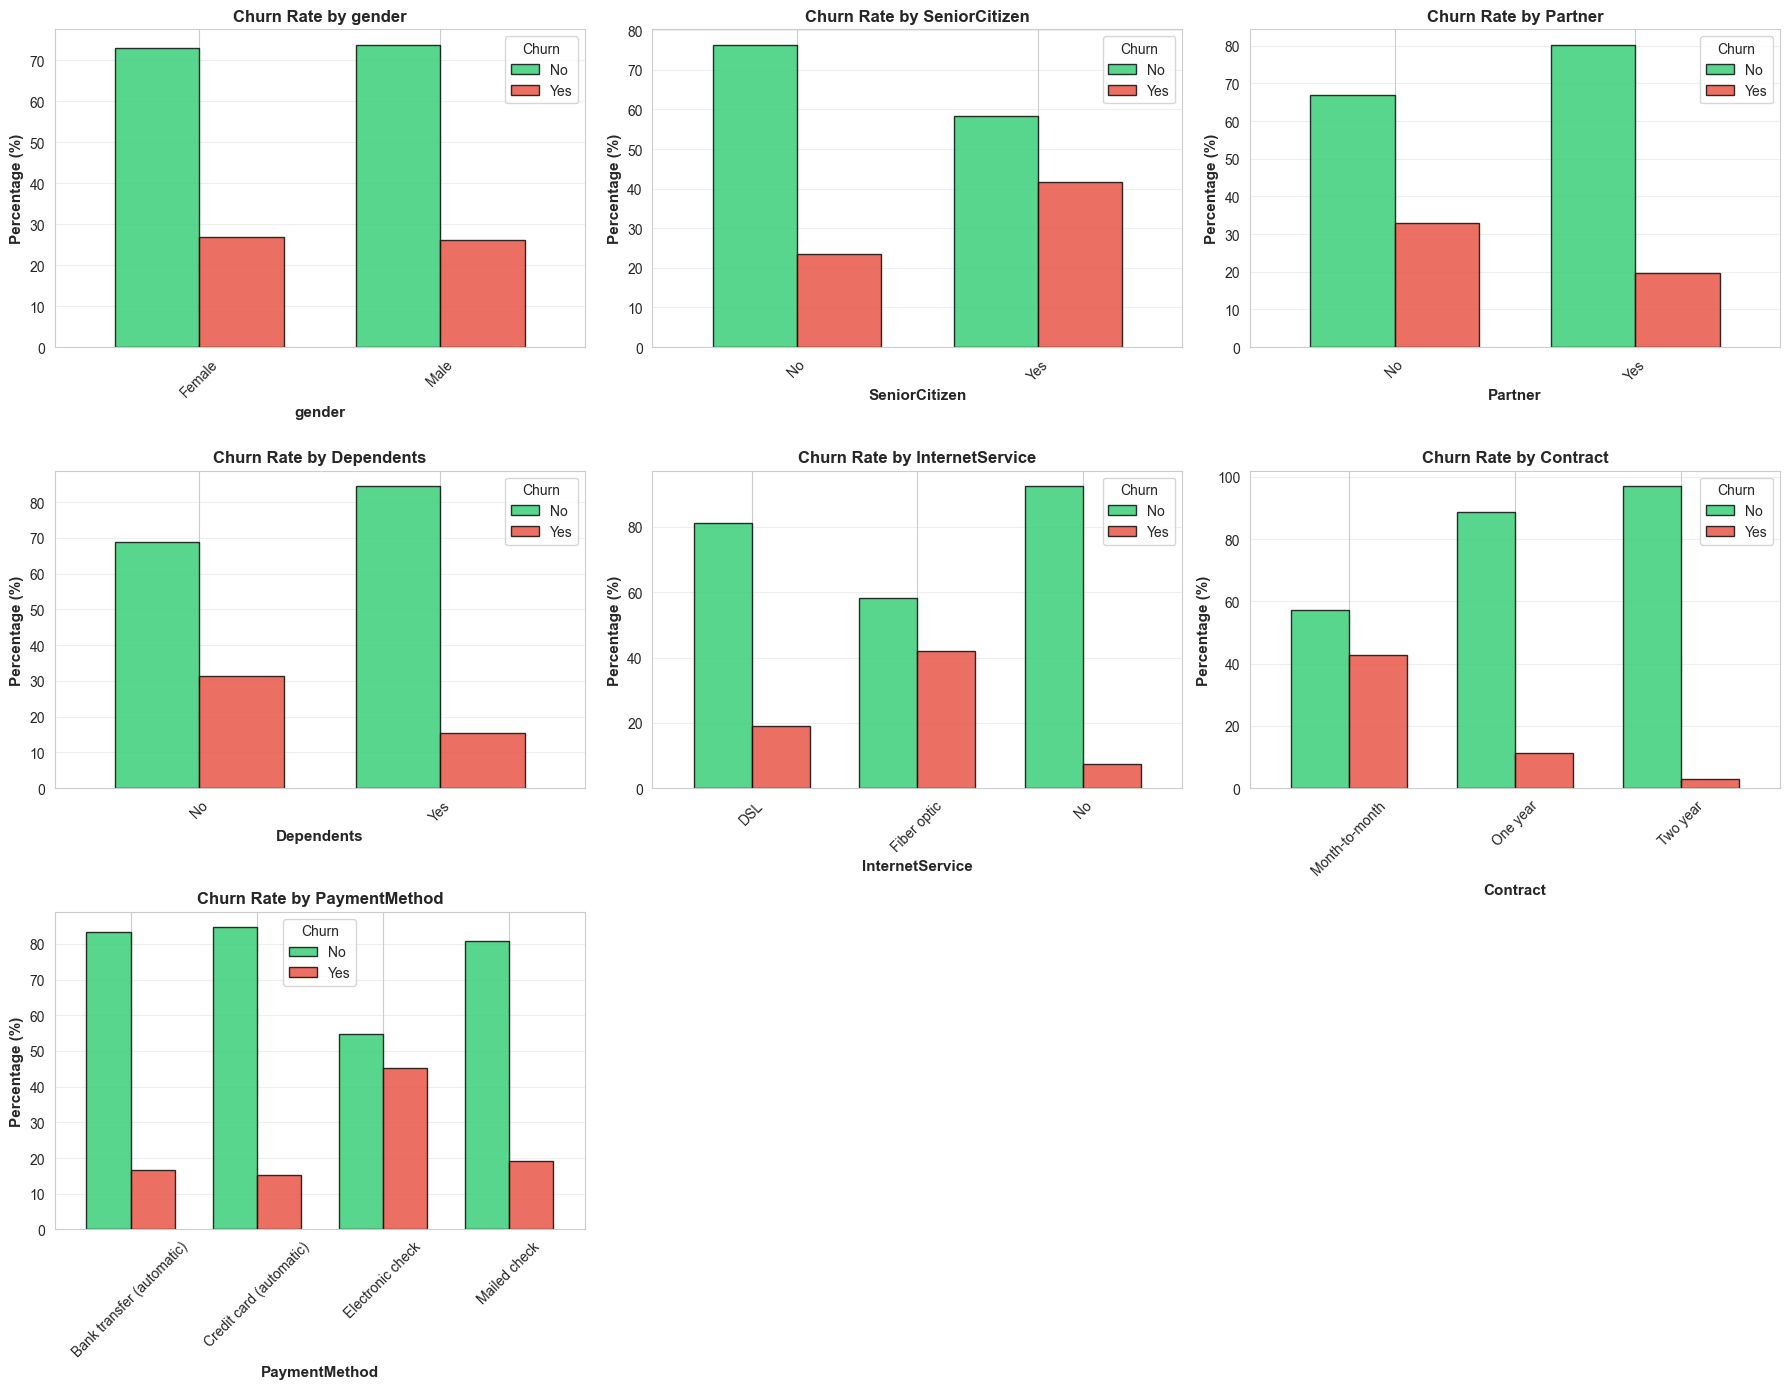


CHURN RATES BY CATEGORY

gender:
gender
Female    26.92
Male      26.16
Name: Churn, dtype: float64

SeniorCitizen:
SeniorCitizen
Yes    41.68
No     23.61
Name: Churn, dtype: float64

Partner:
Partner
No     32.96
Yes    19.66
Name: Churn, dtype: float64

Dependents:
Dependents
No     31.28
Yes    15.45
Name: Churn, dtype: float64

InternetService:
InternetService
Fiber optic    41.89
DSL            18.96
No              7.40
Name: Churn, dtype: float64

Contract:
Contract
Month-to-month    42.71
One year          11.27
Two year           2.83
Name: Churn, dtype: float64

PaymentMethod:
PaymentMethod
Electronic check             45.29
Mailed check                 19.11
Bank transfer (automatic)    16.71
Credit card (automatic)      15.24
Name: Churn, dtype: float64


In [8]:
# Identify categorical columns
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                   'PhoneService', 'MultipleLines', 'InternetService',
                   'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                   'TechSupport', 'StreamingTV', 'StreamingMovies',
                   'Contract', 'PaperlessBilling', 'PaymentMethod']

# Analyze key categorical features
key_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
                'InternetService', 'Contract', 'PaymentMethod']

fig, axes = plt.subplots(3, 3, figsize=(18, 14))
axes = axes.ravel()

for idx, col in enumerate(key_features):
    # Create cross-tabulation
    ct = pd.crosstab(df[col], df['Churn'], normalize='index') * 100
    
    # Plot grouped bar chart
    ct.plot(kind='bar', ax=axes[idx], color=['#2ecc71', '#e74c3c'], 
           alpha=0.8, edgecolor='black', width=0.7)
    axes[idx].set_title(f'Churn Rate by {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col, fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Percentage (%)', fontsize=11, fontweight='bold')
    axes[idx].legend(title='Churn', labels=['No', 'Yes'])
    axes[idx].grid(axis='y', alpha=0.3)
    axes[idx].tick_params(axis='x', rotation=45)

# Remove extra subplots
for idx in range(len(key_features), 9):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.savefig('../static/images/categorical_features.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n" + "=" * 80)
print("CHURN RATES BY CATEGORY")
print("=" * 80)
for col in key_features:
    churn_rate = df.groupby(col)['Churn'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100)
    print(f"\n{col}:")
    print(churn_rate.round(2).sort_values(ascending=False))

## 7. Correlation Analysis

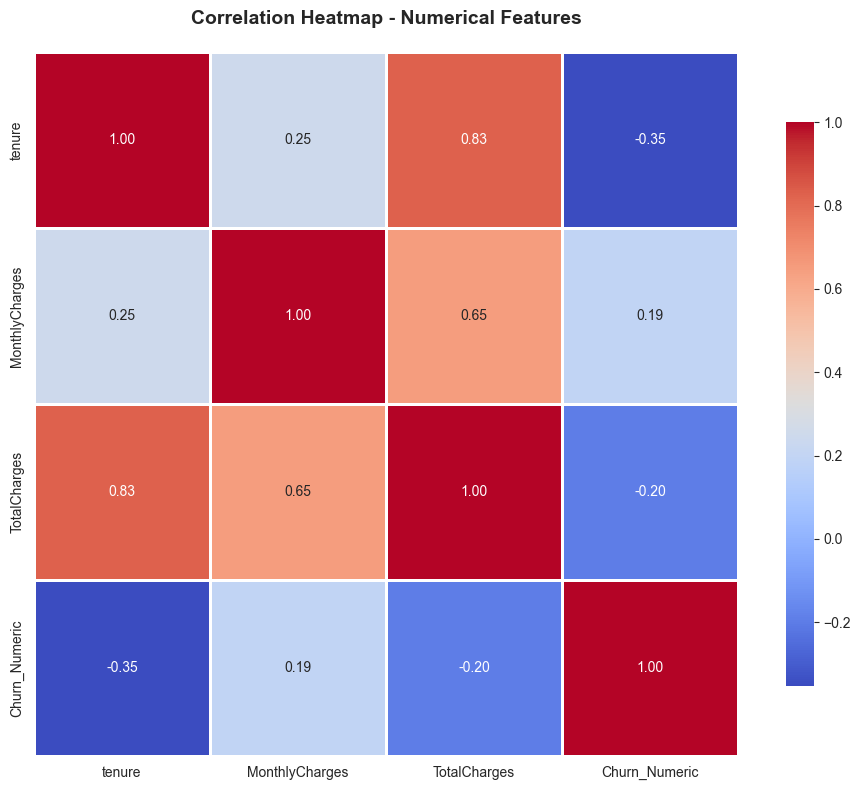


Correlation with Churn:
MonthlyCharges      :  0.193
TotalCharges        : -0.198
tenure              : -0.352


In [9]:
# Create correlation matrix for numerical features
df_numeric = df[numerical_cols].copy()
df_numeric['Churn_Numeric'] = (df['Churn'] == 'Yes').astype(int)

correlation_matrix = df_numeric.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
           square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap - Numerical Features', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../static/images/correlation_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nCorrelation with Churn:")
print("=" * 80)
churn_corr = correlation_matrix['Churn_Numeric'].drop('Churn_Numeric').sort_values(ascending=False)
for feature, corr_value in churn_corr.items():
    print(f"{feature:20s}: {corr_value:6.3f}")

## 8. Key Insights and Findings

Based on the exploratory data analysis, we can derive several important insights:

### Key Findings:

1. **Churn Rate**: Approximately 26-27% of customers churn, indicating a significant retention challenge

2. **Tenure Impact**: 
   - Customers with shorter tenure are more likely to churn
   - Long-term customers show higher loyalty

3. **Contract Type**:
   - Month-to-month contracts have the highest churn rates
   - Two-year contracts show lowest churn, indicating commitment value

4. **Payment Method**:
   - Electronic check users show higher churn rates
   - Automatic payment methods correlate with lower churn

5. **Internet Service**:
   - Fiber optic customers have higher churn despite premium service
   - May indicate service quality or pricing issues

6. **Charges**:
   - Higher monthly charges correlate with increased churn
   - Price sensitivity is a key factor

7. **Additional Services**:
   - Customers without online security, tech support, and backup services show higher churn
   - Value-added services improve retention

### Recommendations:
- Focus retention efforts on month-to-month contract customers
- Improve fiber optic service quality or pricing
- Promote value-added security and support services
- Incentivize longer-term contracts
- Target early intervention for new customers (first 6 months)